In [1]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

from skimage import io, measure               # Module from skimage
from skimage.filters import gaussian # Module working with a gaussian filter                           # Library to work with file paths
import os
%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

from skimage.morphology import binary_dilation
from skimage.segmentation import watershed
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening
from skimage.morphology import disk
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from skimage.segmentation import watershed    # Watershed algorithm
from skimage.filters import difference_of_gaussians
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as ski_io, color as ski_color, filters as ski_filters
from PIL import Image
import scipy as sp
import cv2


You need to change directory path at the beggining and the end of the code

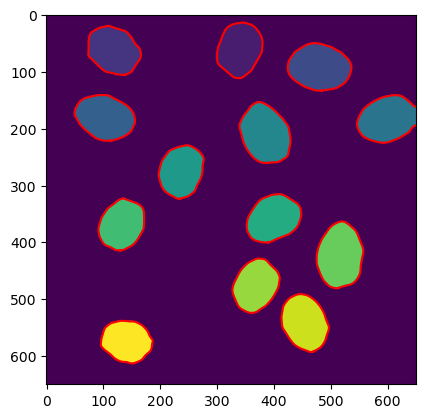

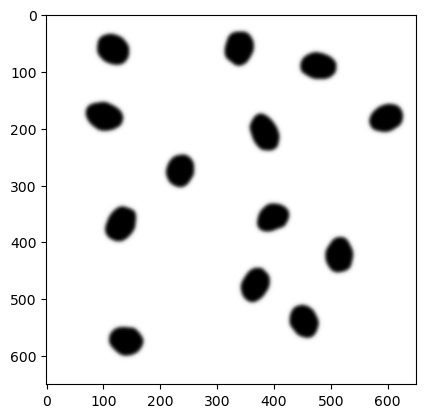

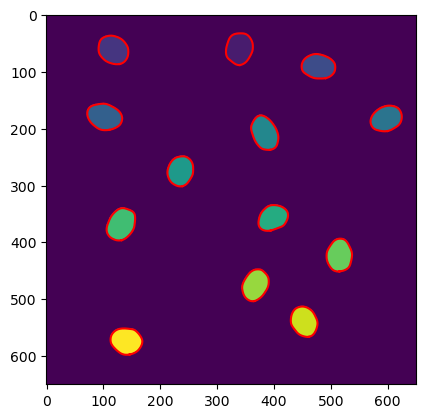

C:\Users\wikto\AppData\Local\Temp\ipykernel_51448\629624475.py:108: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(tiff_file_name, tiff_to_save)


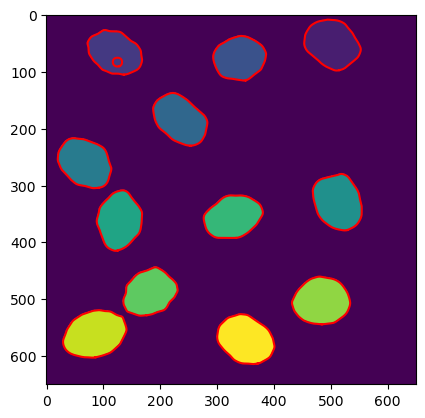

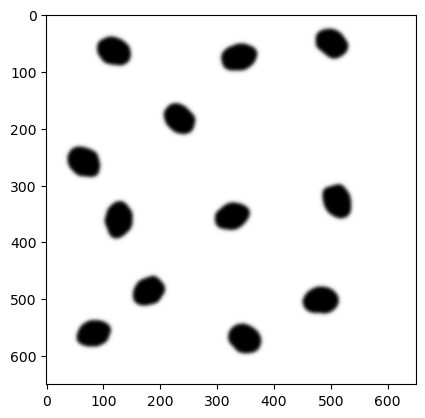

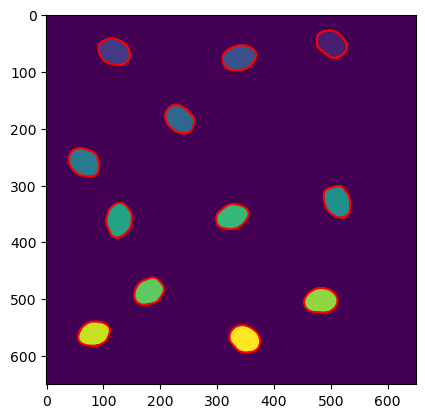

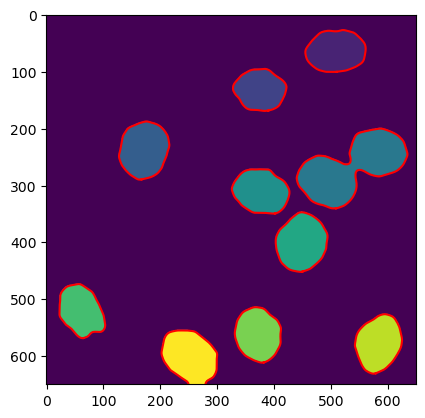

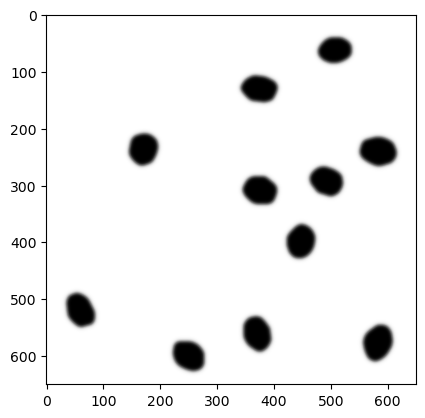

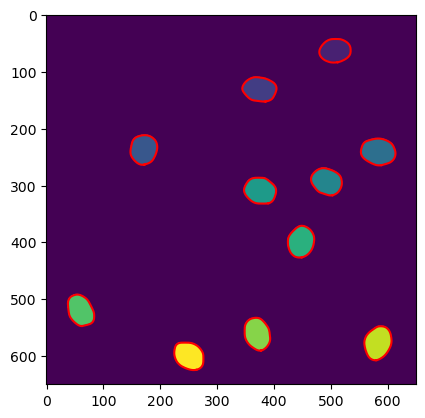

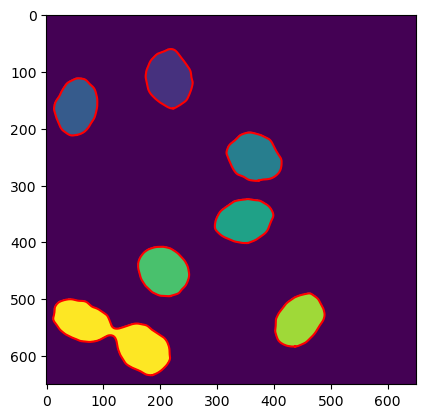

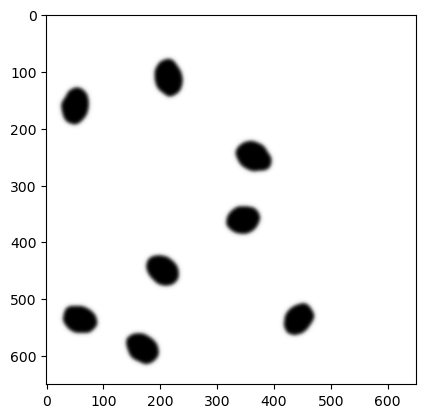

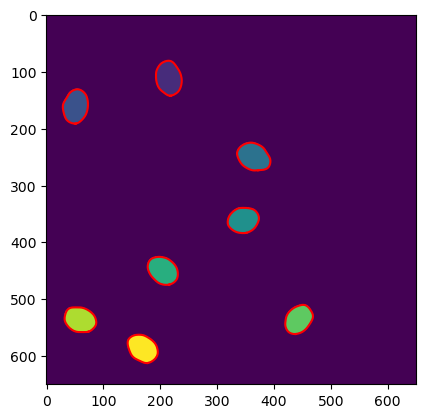

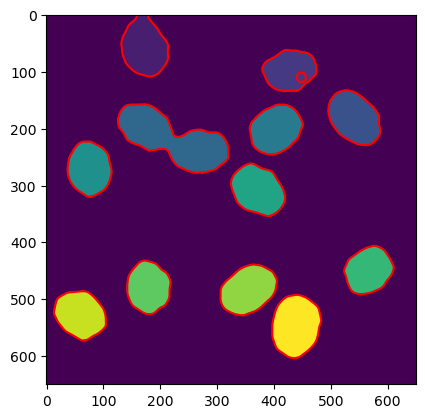

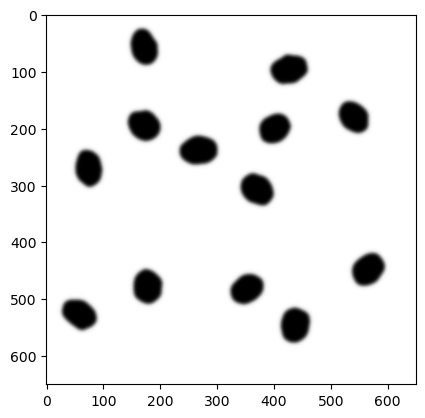

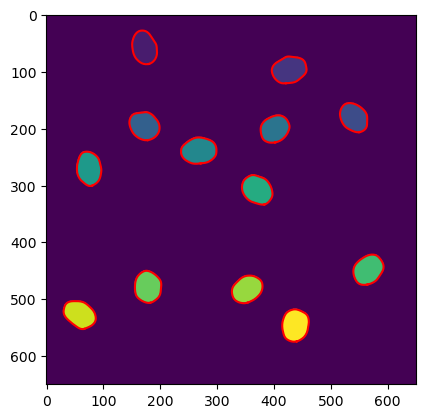

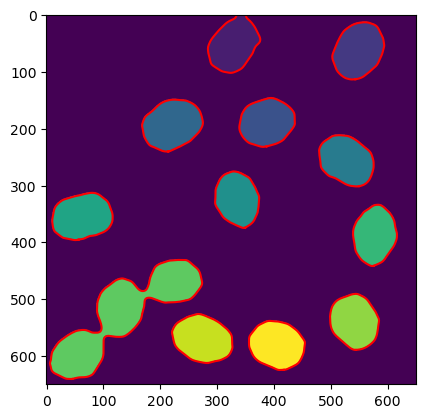

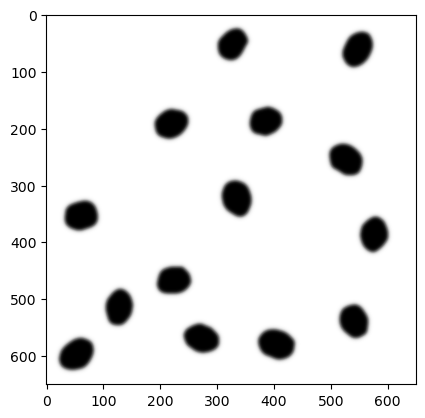

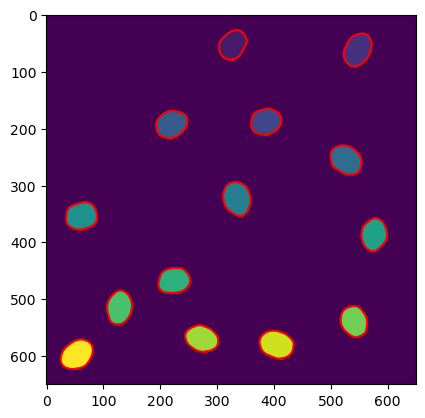

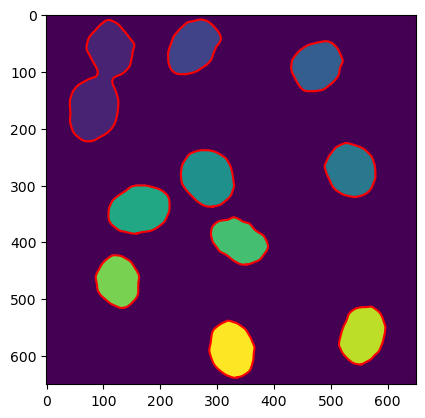

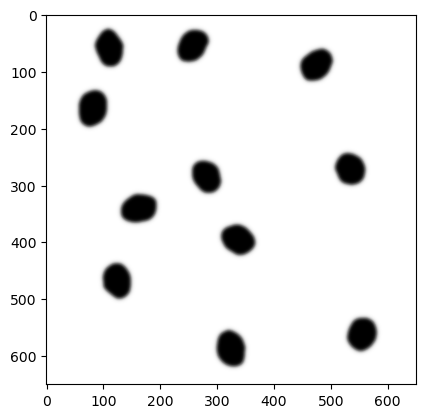

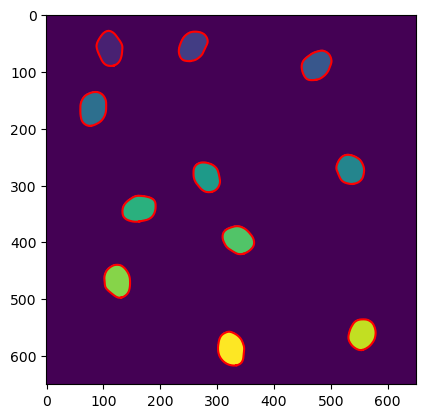

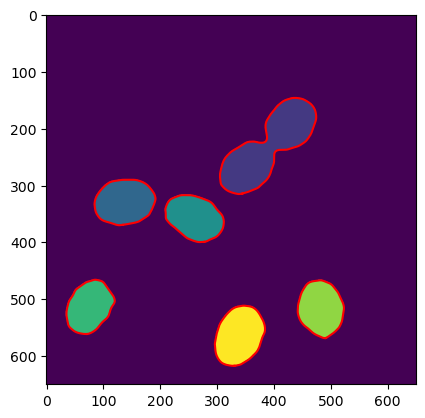

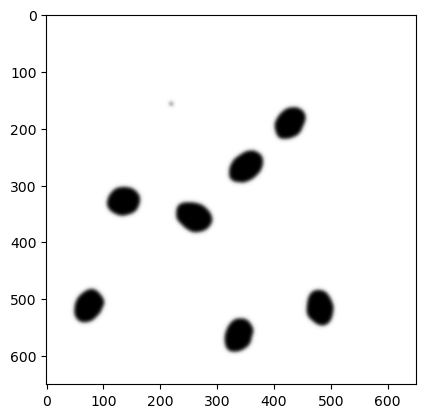

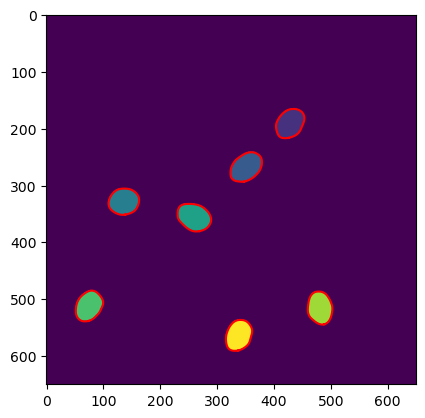

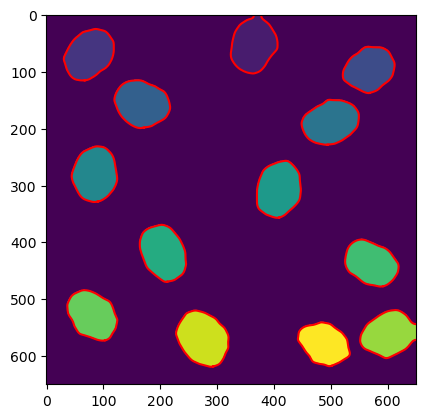

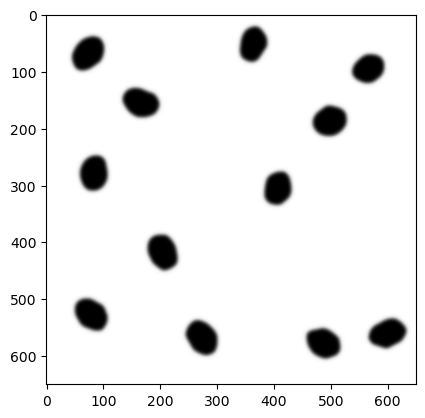

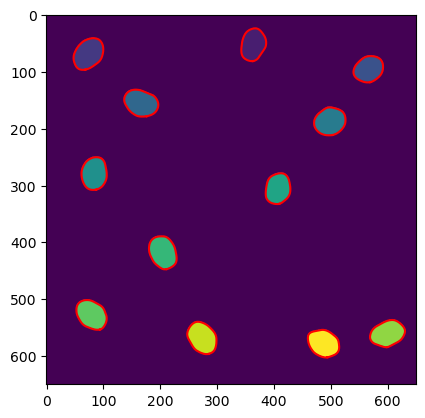

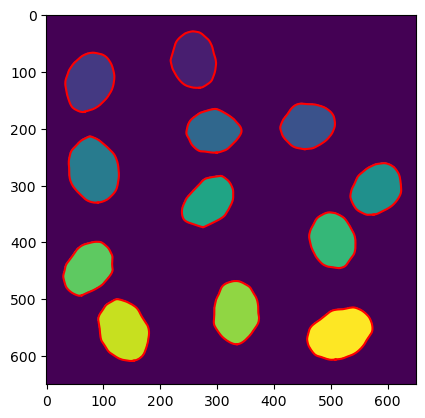

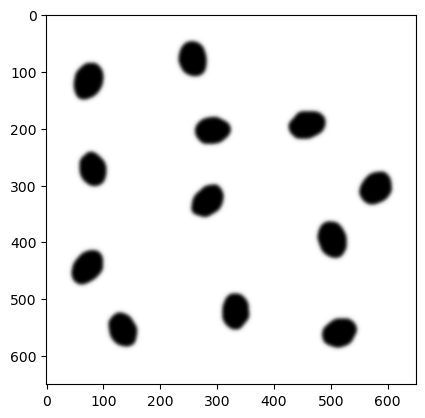

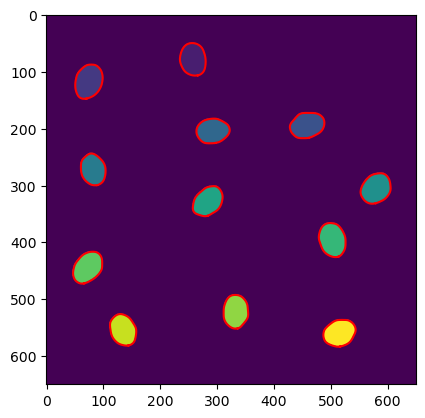

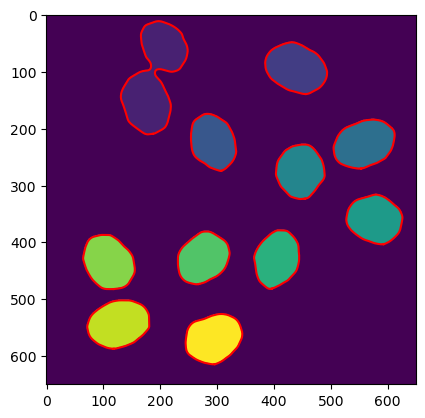

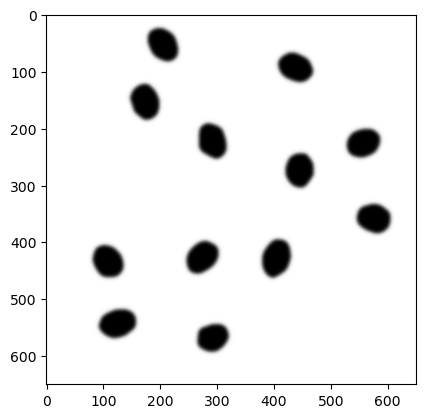

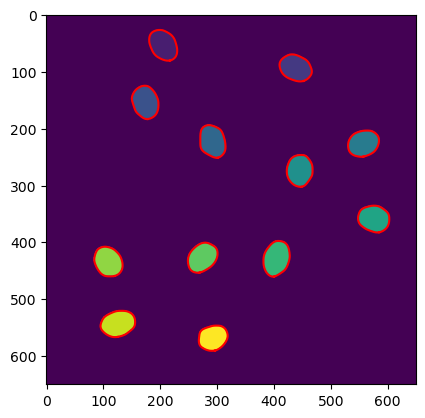

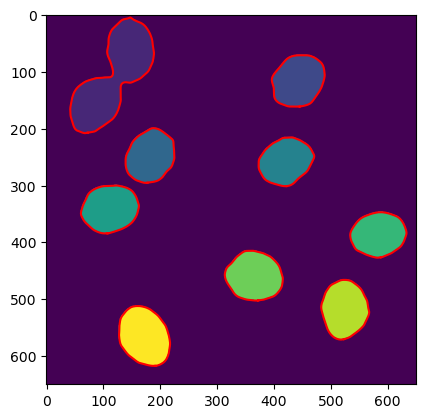

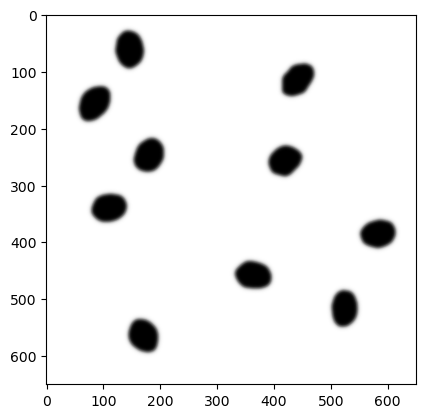

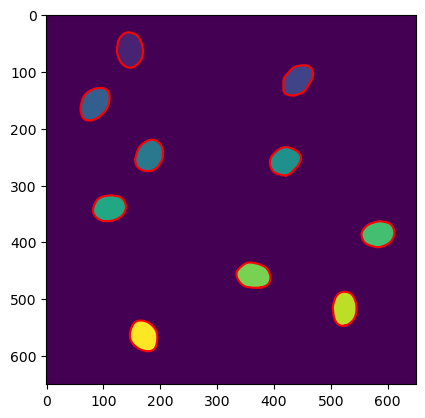

In [3]:

directory = Path('NoDrug/')
files =directory.glob('*.tif')
# Pattern to match TIFF files

for file in files:
    img = imread((file))
    img_G = img[0,:,:,1]

    #gaussian filter
    img_G_filtered = ski_filters.gaussian(img_G, sigma=3)
    threshold = 0.225
    #threshold = 0.225

    #binaryzation
    img_G_bin = img_G_filtered > threshold
    img_G_bin = img_G_bin.astype(int)

    # Define the kernel
    kernel = np.ones((4, 4), np.uint8)

    # Apply Erosion
    eroded = cv2.erode(img_G_filtered, kernel, iterations=2)
    # Apply Dilation
    dilated = cv2.dilate(eroded, kernel, iterations=2)

    mask_image = np.zeros(img_G.shape)
    mask_image[eroded>threshold] = 255
    new_mask = gaussian(mask_image, sigma=3)



    #find contours
    contours = measure.find_contours(new_mask, level=200 ) # level is half of 255 (ish). What happens if we change it?
    contours_connected = np.vstack((contours))
    # downsample the contours
    contours_connected = contours_connected[::20] 

    plt.imshow(new_mask, cmap='Greys')
    

    #visualize the contours for green channel
    for contour in contours:
        plt.plot(contour[:,1],contour[:,0],color='r')  

    # make a new mask from the contours array
    watershed_starting_mask = np.zeros(img_G_filtered.shape).astype(int)                    # Pre-allocating an array with zeros. Notice the datatype.
    

    for contour in contours:

        rr, cc = polygon(contour[:,0], contour[:,1])           # Returns the coordinates inside the contour
        watershed_starting_mask[rr,cc] = 255                                           # Replacing all values inside the contour with ones.

        labels_G = ndi.label(watershed_starting_mask)
        plt.imshow(labels_G[0])
    plt.show()
        

    #red channel
    img_R = img[0,:,:,0]

    #gaussian filter
    img_R_filtered = ski_filters.gaussian(img_R, sigma=3.5)
    #threshold_R = (np.max(img_R_filtered) + np.min(img_R_filtered))/2
    threshold_R = 0.5

    img_R_bin = img_R_filtered > threshold_R
    img_R_bin = img_R_bin.astype(int)

    mask_image_R = np.zeros(img_R.shape)
    mask_image_R[img_R_filtered>threshold_R] = 255
    new_mask_R = gaussian(mask_image_R, sigma=3.5)

    plt.imshow(new_mask_R, cmap='Greys')
    plt.show()
    #visualise the contours for red channel
    contoursR = measure.find_contours(new_mask_R, level=200 ) # level is half of 255 (ish). What happens if we change it?
    contoursR_connected = np.vstack((contoursR))
    # downsample the contours
    contoursR_connected = contoursR_connected[::20] 

    for contour2 in contoursR:
        plt.plot(contour2[:,1],contour2[:,0],color='r')  
        

    # make a new mask from the contours array
    watershed_starting_mask_R = np.zeros(img_R_filtered.shape).astype(int)                    # Pre-allocating an array with zeros. Notice the datatype.
    for contour2 in contoursR:
        rr, cc = polygon(contour2[:,0], contour2[:,1])           # Returns the coordinates inside the contour
        watershed_starting_mask_R[rr,cc] = 255                                           # Replacing all values inside the contour with ones.

        labels_R = ndi.label(watershed_starting_mask_R)
        plt.imshow(labels_R[0])

    plt.show()


    tiff_to_save = np.zeros((img.shape[1], img.shape[2], 2), dtype=np.uint8)
    #save masks to a tiff file
    #generate tiff file name from the original file name
    #save it in new directory
    #save the masks to the 2 different channels
    tiff_to_save[:,:,0] =  labels_R[0]
    tiff_to_save[:,:,1] =  labels_G[0]

    tiff_file_name = file.stem + '_mask.tif'
    tiff_file_name = 'NoDrug_masks/' + tiff_file_name
    tifffile.imsave(tiff_file_name, tiff_to_save)
        
